In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation = 'relu')(input_img)
decoded = layers.Dense(784, activation = 'sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [3]:
(x_train, _), (x_test, _) =mnist.load_data()
x_train= x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [4]:
autoencoder.fit(x_train, x_train,
                epochs = 13,
                batch_size = 256,
                shuffle = True, validation_data = (x_test, x_test)
)

Epoch 1/13
235/235 [==============================] - 8s 15ms/step - loss: 0.2751 - val_loss: 0.1887
Epoch 2/13
235/235 [==============================] - 3s 11ms/step - loss: 0.1708 - val_loss: 0.1532
Epoch 3/13
235/235 [==============================] - 2s 8ms/step - loss: 0.1444 - val_loss: 0.1342
Epoch 4/13
235/235 [==============================] - 2s 7ms/step - loss: 0.1292 - val_loss: 0.1221
Epoch 5/13
235/235 [==============================] - 2s 8ms/step - loss: 0.1190 - val_loss: 0.1135
Epoch 6/13
235/235 [==============================] - 1s 4ms/step - loss: 0.1119 - val_loss: 0.1076
Epoch 7/13
235/235 [==============================] - 1s 6ms/step - loss: 0.1067 - val_loss: 0.1032
Epoch 8/13
235/235 [==============================] - 1s 6ms/step - loss: 0.1026 - val_loss: 0.0998
Epoch 9/13
235/235 [==============================] - 1s 6ms/step - loss: 0.0997 - val_loss: 0.0973
Epoch 10/13
235/235 [==============================] - 1s 5ms/step - loss: 0.0977 - val_loss: 0.09

In [5]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 1ms/step


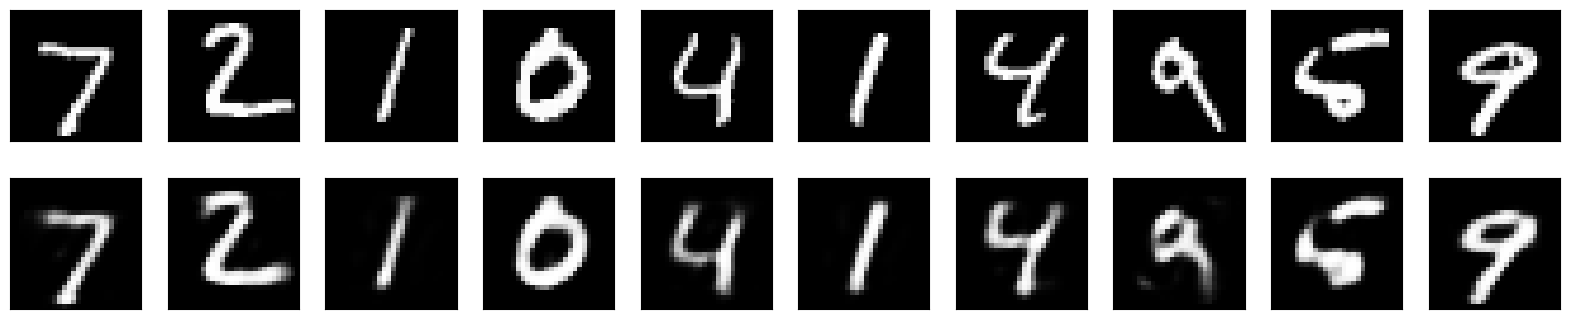

In [6]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()